In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
Imgs_dummy = np.load('../data/train_imgs.npy')
labels_dummy = np.load('../data/train_label.npy')

Imgs = Imgs_dummy[np.where(labels_dummy!=-1)[0]]
labels = labels_dummy[np.where(labels_dummy!=-1)[0]]

l = []
for i in range(len(labels)):
    l.append([labels[i], int(not labels[i])])
l = np.array(l)

In [3]:
X = Imgs
y = l

img_rows, img_cols = X[0].shape
input_shape = (img_rows, img_cols, 1)

X = X.reshape(X.shape[0], img_rows, img_cols, 1)
X = X.astype('float32')

shuffler = np.random.permutation(len(X))
X_new = X[shuffler]
y_new = y[shuffler]

test_size = int(len(X)*0.1)

X_train, X_val, y_train, y_val = train_test_split(X_new[:-test_size], y_new[:-test_size], test_size=0.2, shuffle=False)
X_test = X_new[-test_size:]
y_test = y_new[-test_size:]


In [55]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(width_shift_range=2, height_shift_range=2, 
                         vertical_flip=False, horizontal_flip=True)
# List to store augmentated data
aug_imgs = []

# Generate a new batch
batch = gen.flow( X_train, y_train, batch_size=len(X_train))
X_batch, y_batch = next(batch)

X_train = np.concatenate((X_train, X_batch))
y_train = np.concatenate((y_train, y_batch))

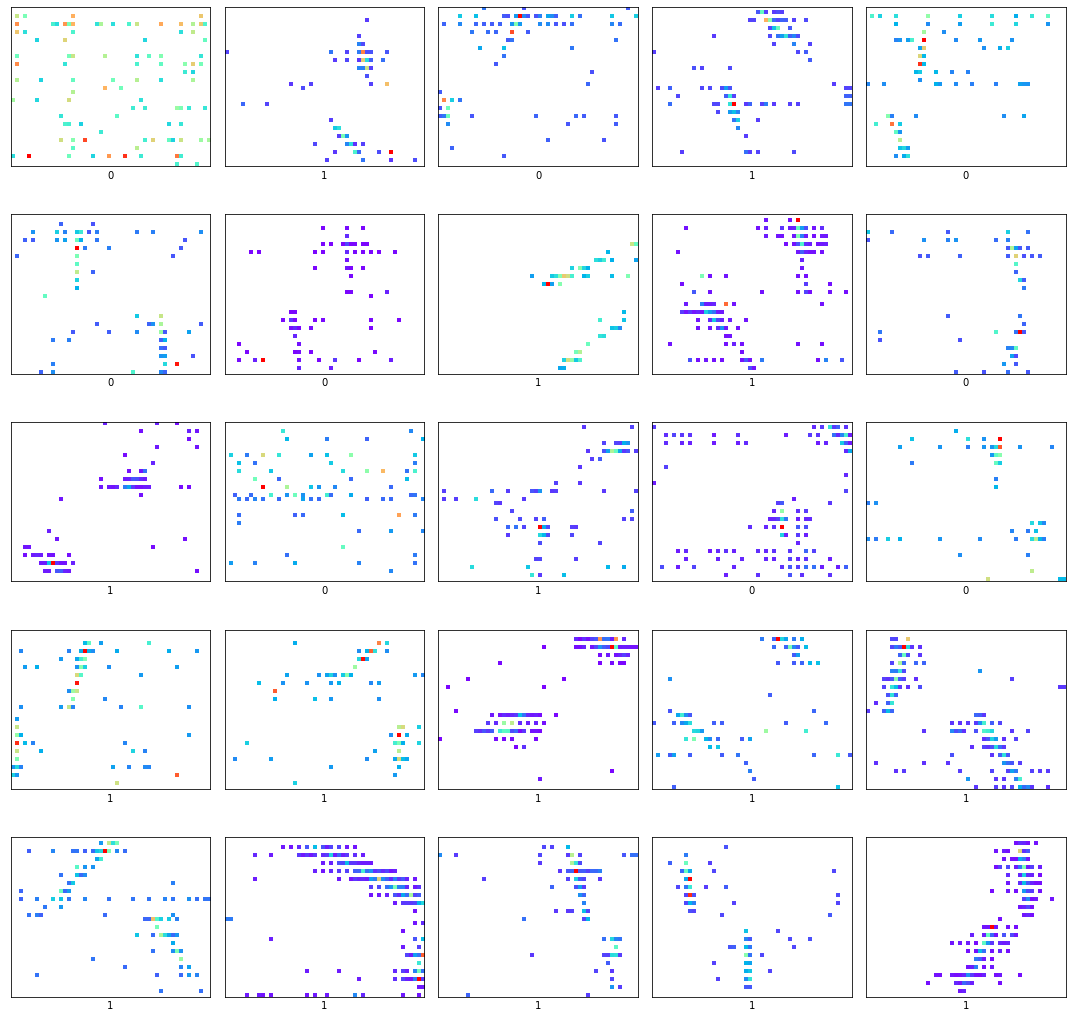

In [63]:
import matplotlib.pyplot as plt
import copy

def plot_image(label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    cmap = copy.copy(plt.cm.get_cmap("rainbow"))
    cmap.set_under(color='white') 
    plt.imshow(img, cmap=cmap, vmin=1e-7)
    
    plt.xlabel("%d" %(label))

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(3*num_cols, 3*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    #ns_idx = np.where(label==0)[0]
    #cr_idx = np.where(label==1)[0]
    b=0
    plot_image(y_batch[i+b][0], X_batch[i+b])
    
    plt.subplots_adjust(wspace = 0.5 )
plt.tight_layout()
plt.show()

In [71]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='softmax'),
  layers.Dropout(0.2),
  layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [73]:
#Train
epochs = 10
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))


Epoch 1/10
1140/1140 [==============================] - 106s 93ms/step - loss: 0.6702 - accuracy: 0.3925 - val_loss: 0.6713 - val_accuracy: 0.3945
Epoch 2/10
1140/1140 [==============================] - 104s 91ms/step - loss: 0.6703 - accuracy: 0.3925 - val_loss: 0.6708 - val_accuracy: 0.3945
Epoch 3/10
1140/1140 [==============================] - 105s 92ms/step - loss: 0.6701 - accuracy: 0.3925 - val_loss: 0.6711 - val_accuracy: 0.3945
Epoch 4/10
 438/1140 [==========>...................] - ETA: 1:03 - loss: 0.6700 - accuracy: 0.3922

KeyboardInterrupt: 

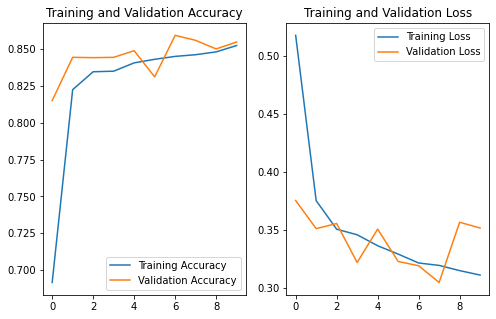

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
predicted_res = model.predict(X_test)
predicted_classes = 


In [59]:
predicted_res

array([[ 4.224887  ],
       [-2.3634708 ],
       [ 1.2083367 ],
       ...,
       [-0.10159735],
       [ 1.8776287 ],
       [ 3.3760586 ]], dtype=float32)

In [ ]:
from sklearn.metrics import classification_report

y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(2)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

